In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import mnist

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Combine train and test datasets for EDA
X = np.concatenate([X_train, X_test])
y = np.concatenate([y_train, y_test])

print(f"Shape of the dataset: {X.shape}")  # 70,000 images, each 28x28 pixels
print(f"Labels shape: {y.shape}")

# Convert the labels to a DataFrame for easier analysis
labels_df = pd.DataFrame(y, columns=['Label'])

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Shape of the dataset: (70000, 28, 28)
Labels shape: (70000,)


Unique labels: [5 0 4 1 9 2 3 6 7 8]

Label counts:
 Label
1    7877
7    7293
3    7141
2    6990
9    6958
0    6903
6    6876
8    6825
4    6824
5    6313
Name: count, dtype: int64


<ipython-input-2-c34b6f442659>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.index, y=label_counts.values, palette='viridis')


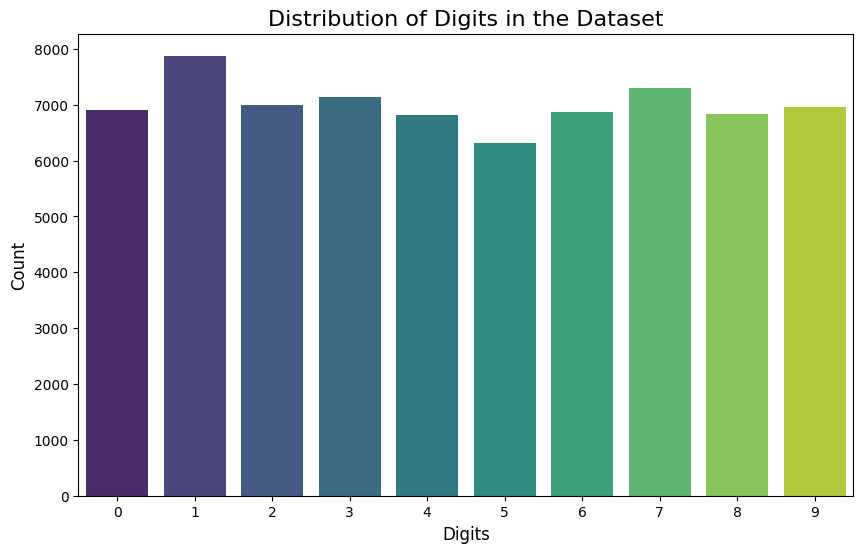

In [2]:
# --------------------------
# 1. Basic Dataset Information
# --------------------------

# Unique classes in the dataset
print("Unique labels:", labels_df['Label'].unique())

# Count of each label
label_counts = labels_df['Label'].value_counts()
print("\nLabel counts:\n", label_counts)

# Plot the distribution of classes
plt.figure(figsize=(10, 6))
sns.barplot(x=label_counts.index, y=label_counts.values, palette='viridis')
plt.title('Distribution of Digits in the Dataset', fontsize=16)
plt.xlabel('Digits', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

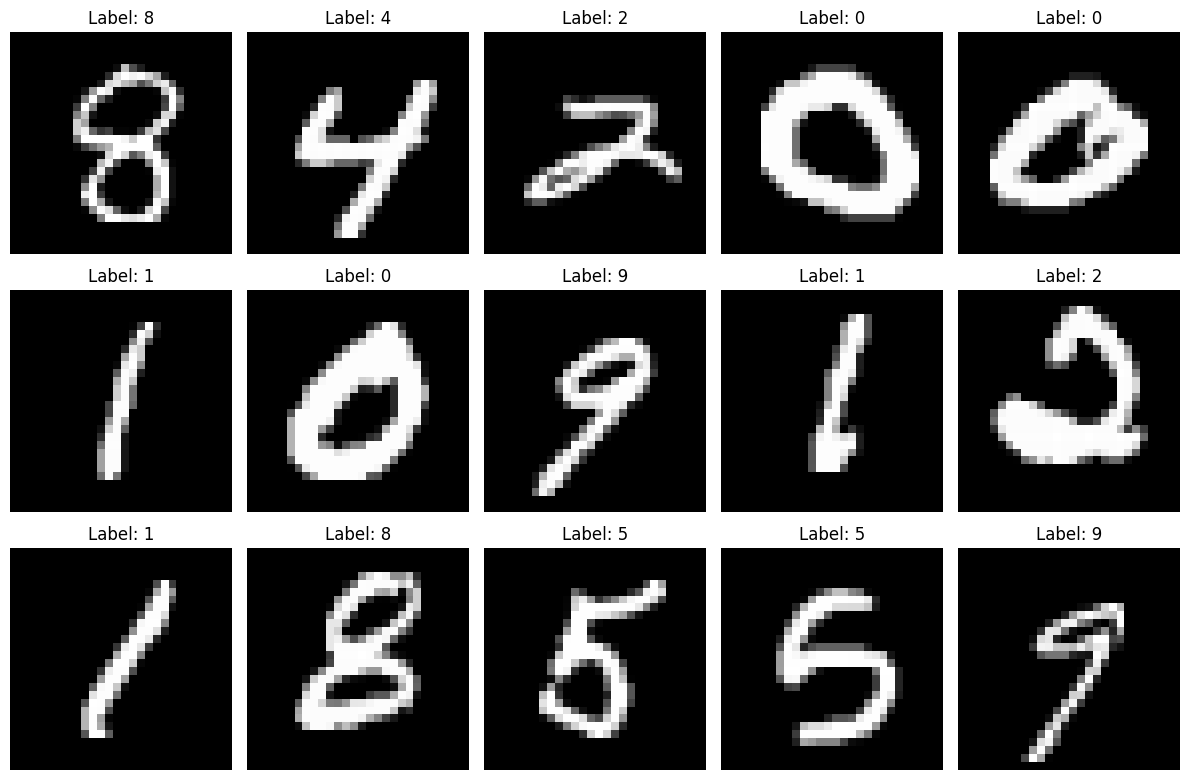

In [3]:
# --------------------------
# 2. Visualizing Sample Images
# --------------------------

# Display 15 random images
plt.figure(figsize=(12, 8))
for i in range(15):
    plt.subplot(3, 5, i+1)
    rand_index = np.random.randint(0, X.shape[0])
    plt.imshow(X[rand_index], cmap='gray')
    plt.title(f"Label: {y[rand_index]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


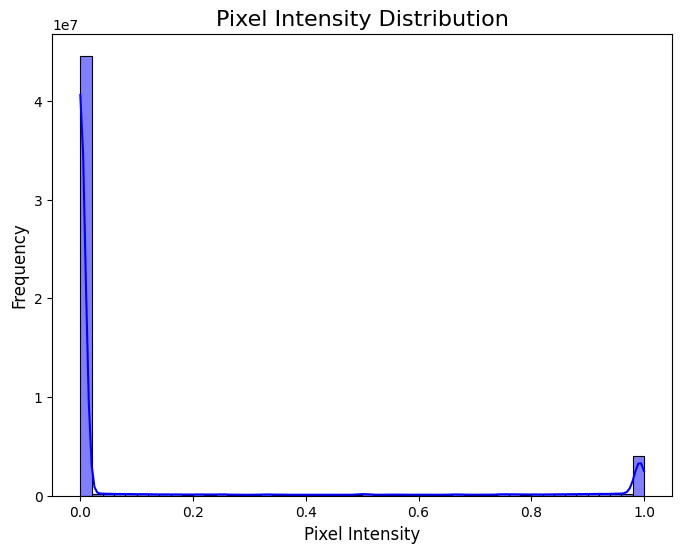

In [4]:
# --------------------------
# 3. Analyzing Pixel Intensity
# --------------------------

# Normalize pixel values for statistical analysis (range: 0 to 1)
X_normalized = X / 255.0

# Flatten images into a 2D array (rows: samples, columns: pixels)
X_flat = X_normalized.reshape(X_normalized.shape[0], -1)

# Analyze pixel intensity distribution
plt.figure(figsize=(8, 6))
sns.histplot(X_flat.flatten(), bins=50, kde=True, color='blue')
plt.title('Pixel Intensity Distribution', fontsize=16)
plt.xlabel('Pixel Intensity', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

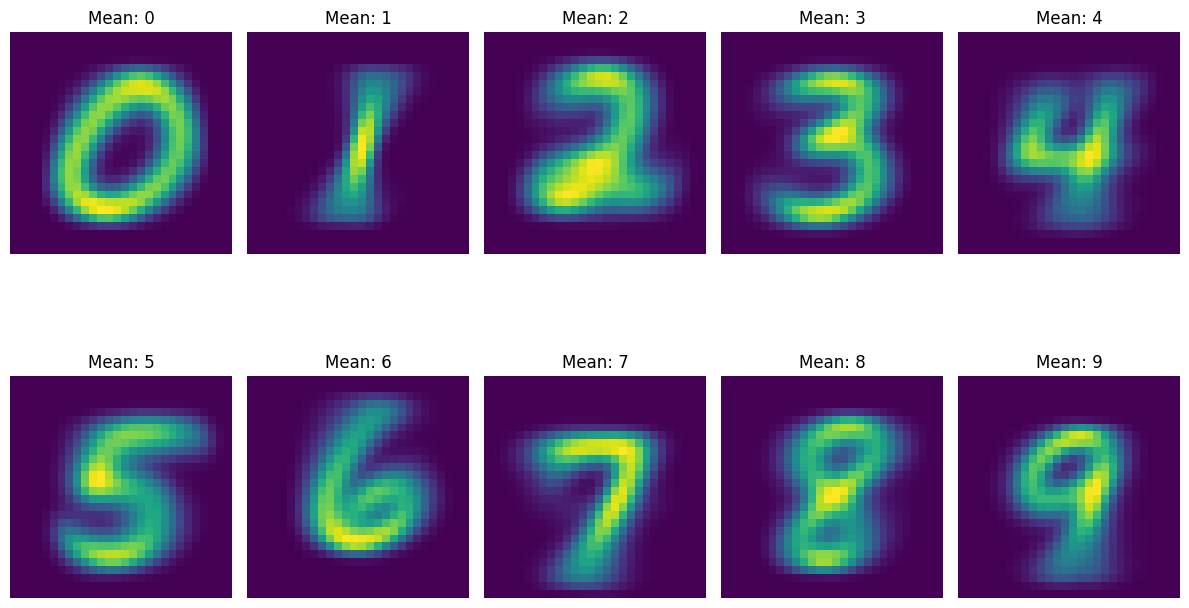

In [5]:
# --------------------------
# 4. Mean Images for Each Digit
# --------------------------

# Compute the mean image for each digit
mean_images = []
for digit in range(10):
    mean_image = X_normalized[y == digit].mean(axis=0)
    mean_images.append(mean_image)

# Display mean images
plt.figure(figsize=(12, 8))
for digit, mean_image in enumerate(mean_images):
    plt.subplot(2, 5, digit+1)
    plt.imshow(mean_image, cmap='viridis')
    plt.title(f"Mean: {digit}")
    plt.axis('off')
plt.tight_layout()
plt.show()

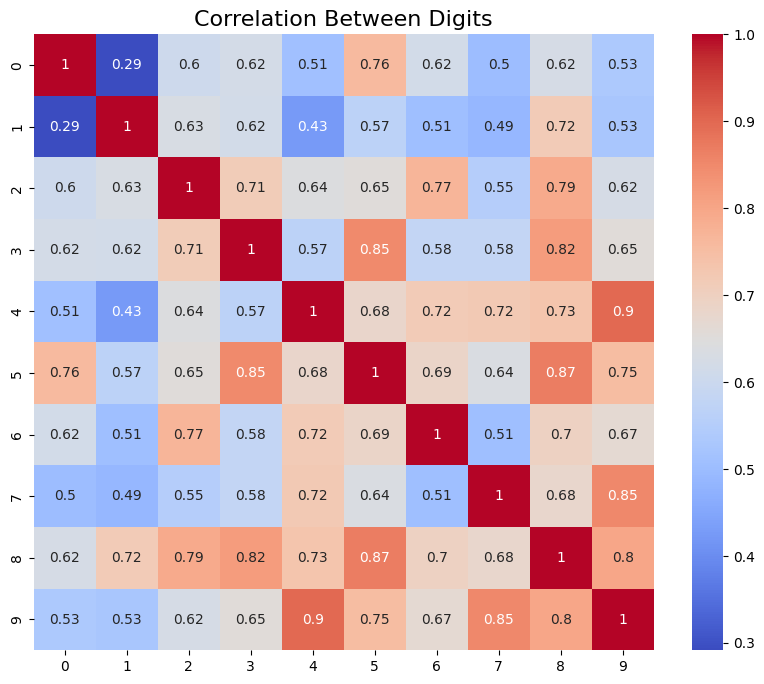

In [6]:
# --------------------------
# 5. Correlation Between Digits
# --------------------------

# Compute pairwise correlation between mean images
mean_flat = np.array(mean_images).reshape(10, -1)  # Flatten mean images
correlation_matrix = np.corrcoef(mean_flat)

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', xticklabels=range(10), yticklabels=range(10))
plt.title('Correlation Between Digits', fontsize=16)
plt.show()

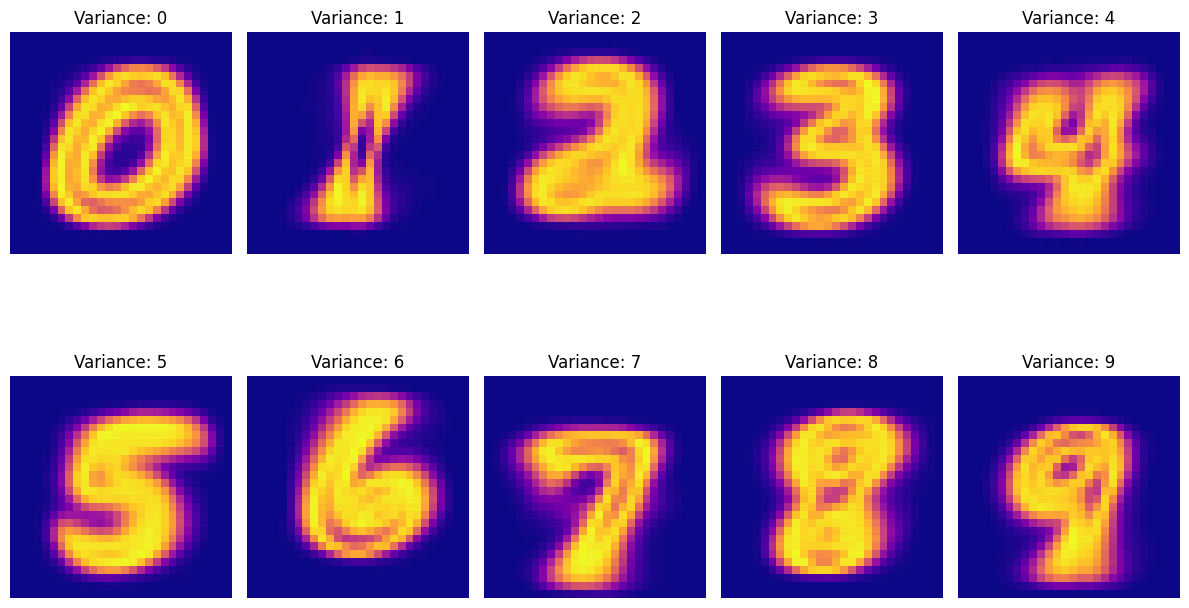

In [7]:
# --------------------------
# 6. Variance Analysis
# --------------------------

# Compute pixel-wise variance for each digit
variance_images = []
for digit in range(10):
    variance_image = X_normalized[y == digit].var(axis=0)
    variance_images.append(variance_image)

# Display variance images
plt.figure(figsize=(12, 8))
for digit, variance_image in enumerate(variance_images):
    plt.subplot(2, 5, digit+1)
    plt.imshow(variance_image, cmap='plasma')
    plt.title(f"Variance: {digit}")
    plt.axis('off')
plt.tight_layout()
plt.show()

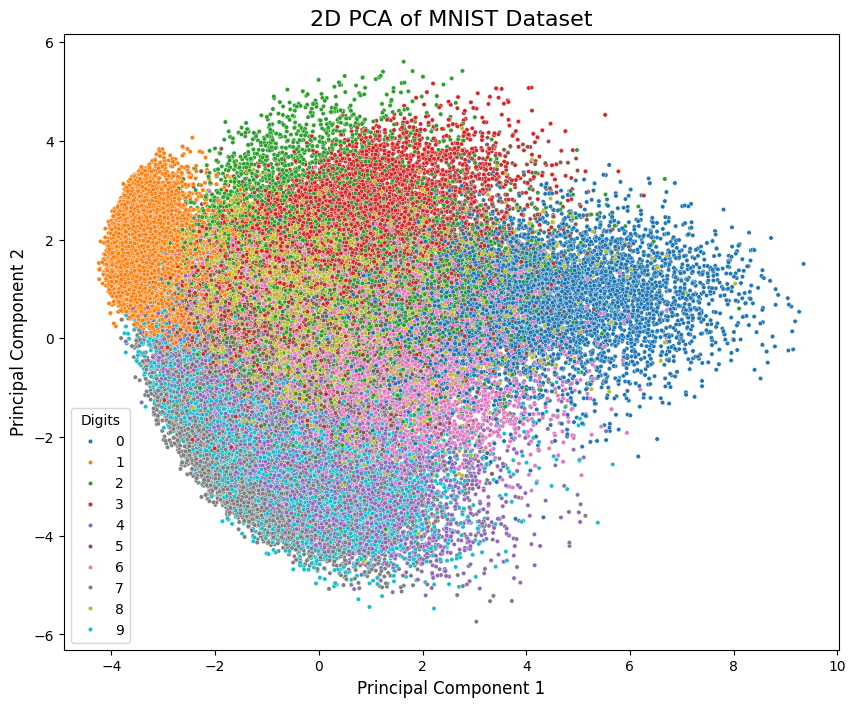

In [8]:
# --------------------------
# 7. Feature Importance (Principal Component Analysis)
# --------------------------

from sklearn.decomposition import PCA

# Perform PCA on flattened images
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_flat)

# Plot the 2D PCA representation
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='tab10', s=10)
plt.title('2D PCA of MNIST Dataset', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.legend(title='Digits', loc='best', fontsize=10)
plt.show()

In [9]:
# --------------------------
# Conclusion
# --------------------------

print("EDA on MNIST completed! Key insights:")
print("- Dataset is well-balanced across all classes.")
print("- Pixel intensity values are concentrated near 0 (black) and 1 (white).")
print("- Mean images and variance reveal distinct patterns for each digit.")
print("- PCA provides a 2D visualization of digit clusters.")

EDA on MNIST completed! Key insights:
- Dataset is well-balanced across all classes.
- Pixel intensity values are concentrated near 0 (black) and 1 (white).
- Mean images and variance reveal distinct patterns for each digit.
- PCA provides a 2D visualization of digit clusters.
